<a href="https://colab.research.google.com/github/angel-lar/Metodos-numericos/blob/main/SerieTylorLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\textbf{Serie de Taylor con Sympy}$

$\text{La serie de Taylor de \( f(x) = \ln(x) \) centrada en \( x = 1 \) se define como:}$

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(1)}{n!} (x - 1)^n
$$

$\text{Calculamos las derivadas de \( \ln(x) \) para expresar la serie de taylor de 4to orden:
}$

\begin{aligned}
    f(x) &= \ln(x) \Rightarrow f(1) = 0 \\
    f'(x) &= \frac{1}{x} \Rightarrow f'(1) = 1 \\
    f''(x) &= -\frac{1}{x^2} \Rightarrow f''(1) = -1 \\
    f'''(x) &= \frac{2}{x^3} \Rightarrow f'''(1) = 2 \\
    f''''(x) &= -\frac{6}{x^4} \Rightarrow f''''(1) = -6
\end{aligned}

$\text{ generalizando vemos que la \( n \)-ésima derivada evaluada en \( x = 1 \) es:}$

$$
f^{(n)}(1) = (-1)^{n+1} (n-1)!
$$

$\text{entonces sustituimos para simplificar nuestra serie de taylor y poderla programar más sencillo: }$

$$
\ln(x) = \sum_{n=1}^{\infty} (-1)^{n+1} \frac{(n-1)!}{n!} (x - 1)^n
$$


$\text{pero como \( (n-1)! / n! = 1/n \), no es necesario calcular factoriales y obtenemos la expresión: }$

$$
\ln(x) = \sum_{n=1}^{\infty} (-1)^{n+1} \frac{(x - 1)^n}{n}
$$

$\text{Expresión la cual ya es más sencilla de programar sin embargo con Sympy podemos evitarnos los calculos de la siguiente manera: }$

$\text{Importamos las librerias}$

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

$\text{Definimos }x\text{ como un simbolo, }f\text{ como la función }ln(x)\text{ y }x_0\text{ como el punto en el que evaluaremos la serie de taylor}$

In [9]:
x = sp.Symbol('x')
f = sp.ln(x)
x0 = 1

$\text{y en }sp.series()\text{ pasamos como parametro la funcion }f\text{ el simbolo }x\text{ el punto a evaluar }x_0\text{ y el grado }n\text{ de la serie de taylor}$

$\text{además con }.remove0()\text{ eliminamos el polinomio de error}$

In [10]:
taylor_series = sp.series(f, x, x0, n=5).removeO()

$\text{Convertimos la serie de taylor en una función evaluable de numpy}$

In [14]:
taylor_func = sp.lambdify(x, taylor_series, 'numpy')

$\text{ahora creamos los valores para graficar}$

In [15]:
x_vals = np.linspace(0.1, 2, 400)  # partimos el eje x en 400 puntos en el intervalo [0.1, 2]
y_vals = np.log(x_vals)  # Valores de ln(x)
y_taylor_vals = taylor_func(x_vals)  # Valores de la aproximación

$\text{ahora usamos matplotlib para graficar}$

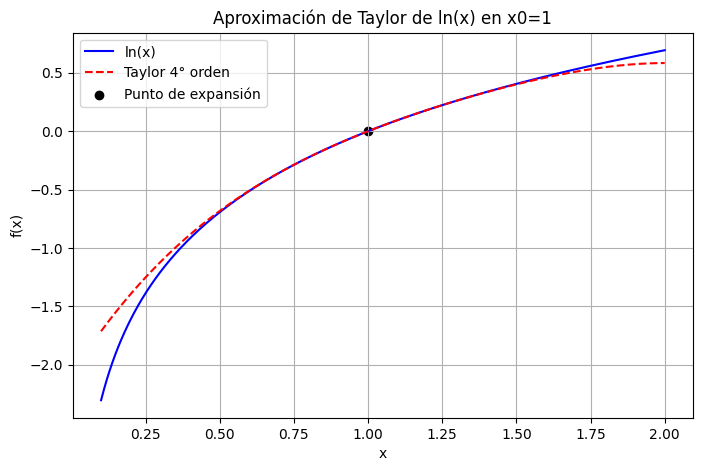

In [16]:
plt.figure(figsize=(8, 5))#creamos una figura de 8x5
plt.plot(x_vals, y_vals, label='ln(x)', color='blue')#como X ponemos el intervalo que dividimos y como Y los valores de ln(x)
plt.plot(x_vals, y_taylor_vals, label='Taylor 4° orden', linestyle='dashed', color='red')#sobreponemos otra grafica pero con Y=la serie de taylor
#y lo ponemos en estilo dashed o "--" para distinguir la grafica en donde se juntan ambos colores
plt.scatter(x0, np.log(x0), color='black', label='Punto de expansión') #dibujamos un punto en (x0, ln(x0)) que será nuerstro punto de expansión
#agregamos etiquetas y mostramos la grafica
plt.title("Aproximación de Taylor de ln(x) en x0=1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

$\text{Luego utilizamos la funcion }sp.pprint()\text{ para imprimir el resultado de la serie de talor en notación matemática}$

In [8]:
sp.pprint(taylor_series)

           4          3          2    
    (x - 1)    (x - 1)    (x - 1)     
x - ──────── + ──────── - ──────── - 1
       4          3          2        
